In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, show
import scipy
from scipy import stats
from tqdm import tqdm

### Charting 2015-2021 Music by Duration

In [69]:
# Import music data from csv
datafile = '../clean_sets/proj1_spotify_chart2_grp.csv'
spotify_data = pd.read_csv(datafile)

In [70]:
# Convert duration column from seconds to minutes and seconds
spotify_data['timestamp'] = spotify_data['Total Duration'].apply(lambda x: '{:02d}:{:02d}:{:02d}'.format((x // 60000), (x // 1000) % 60, x % 1000 // 10))

In [71]:
# Number formatting
spotify_data['Mean Duration'] = spotify_data['Mean Duration']/60000
spotify_data['Total Duration'] = spotify_data['Total Duration']/60000

In [72]:
# Drop Columns 
spotify_data.drop('Unnamed: 0', axis=1, inplace=True)

In [73]:
# Create a new column to categorize duration as short, radio-ready, or long
spotify_data['duration_cat'] = pd.cut(spotify_data['Mean Duration'], bins=[0, 2, 3, float('inf')], labels=['short', 'radio-ready', 'long'])

In [74]:
# Create a new column 'Year' by extracting the first four characters of the 'quarter' column
spotify_data['Year'] = spotify_data['First Quarter'].str[:4]
spotify_data['Year'] = pd.to_datetime(spotify_data['Year'])

In [75]:
spotify_data.head(10)

,Song Name,Mean Streams,Total Streams,Stream Count,Mean Duration,Total Duration,First Quarter,Last Quarter,timestamp,duration_cat,Year
0,2002,109962.199805,564655896,5135,3.116433,16002.885167,2018Q4,2020Q3,16002:53:11,long,2018-01-01
1,!,21651.913580,1753805,81,2.732600,221.340600,2019Q3,2020Q1,221:20:43,radio-ready,2019-01-01
2,"""Eléglesz""",8817.000000,8817,1,3.450000,3.450000,2016Q1,2016Q1,03:27:00,long,2016-01-01
3,"""Hit the Quan"" #HTQ",523592.500000,3141555,6,3.018000,18.108000,2015Q3,2015Q3,18:06:48,long,2015-01-01
4,"""Jag fakking hatar er""",238270.000000,1191350,5,2.432817,12.164083,2018Q4,2018Q4,12:09:84,radio-ready,2018-01-01
5,"""Solo"" E' Solo Una Parola",94732.500000,757860,8,3.694000,29.552000,2016Q4,2016Q4,29:33:12,long,2016-01-01
6,# fuori c'è il sole,152749.138889,10997938,72,3.212000,231.264000,2015Q4,2016Q1,231:15:84,long,2015-01-01
7,#10 Dream,261649.000000,784947,3,1.613500,4.840500,2016Q3,2016Q3,04:50:43,short,2016-01-01
8,#25,264912.000000,1059648,4,3.228567,12.914267,2020Q4,2020Q4,12:54:85,long,2020-01-01
9,#302,112749.708333,2705993,24,4.481100,107.546400,2019Q4,2020Q1,107:32:78,long,2019-01-01


[None]

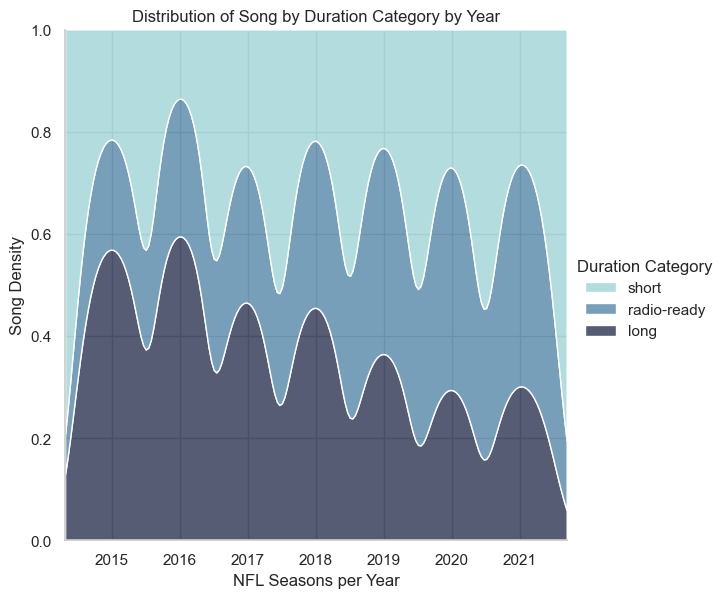

In [78]:
# Chart Aestetics
sns.set_theme(style="whitegrid")

# Chart Contents 
MbD = sns.displot(
    data=spotify_data,
    x='Year', hue='duration_cat', 
    kind='kde', height=6,
    multiple="fill", clip=(0,None),
    palette="ch:rot=-.25,hue=1,light=.75",
    common_norm=False
    )

# Chart Legends
MbD.set(
    xlabel='NFL Seasons per Year',
    ylabel = 'Song Density',
    title='Distribution of Song by Duration Category by Year'
)
MbD._legend.set(
    title='Duration Category'
)

### Charting 2015-2021 Songs by Streams and Length

In [41]:
# Import music data from csv
datafile2 = '../clean_sets/proj1_spotify_chart1_grp.csv'
spotify_data2 = pd.read_csv(datafile2)

In [42]:
# Drop Columns 
spotify_data2.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
spotify_data2['Week Number'] = spotify_data2['Week Number'].str.extract('(\d+)').astype(int)

In [61]:
spotify_data2 = spotify_data2.sort_values('Week Number')

In [62]:
spotify_data2

,Week Number,Mean Streams,Total Streams,Mean Duration,Total Duration,First Quarter,Last Quarter
0,1,308621.573311,116456807581,212873.271256,80326664542,2019Q3,2016Q3
10,2,308621.573311,116456807581,212873.271256,80326664542,2019Q3,2016Q3
11,3,308621.573311,116456807581,212873.271256,80326664542,2019Q3,2016Q3
12,4,305561.999328,101346665003,211608.090441,70184690181,2019Q3,2017Q4
13,5,299609.578173,117043380542,212265.369225,82922103284,2019Q4,2016Q4
14,6,299609.578173,117043380542,212265.369225,82922103284,2019Q4,2016Q4
15,7,299609.578173,117043380542,212265.369225,82922103284,2019Q4,2016Q4
16,8,326143.195207,105200749046,210706.458860,67965475370,2019Q4,2016Q4
17,9,292045.660736,75704076176,214869.859837,55698565067,2016Q4,2017Q4
1,10,303958.065842,80050092262,212735.094479,56025701747,2018Q4,2015Q4


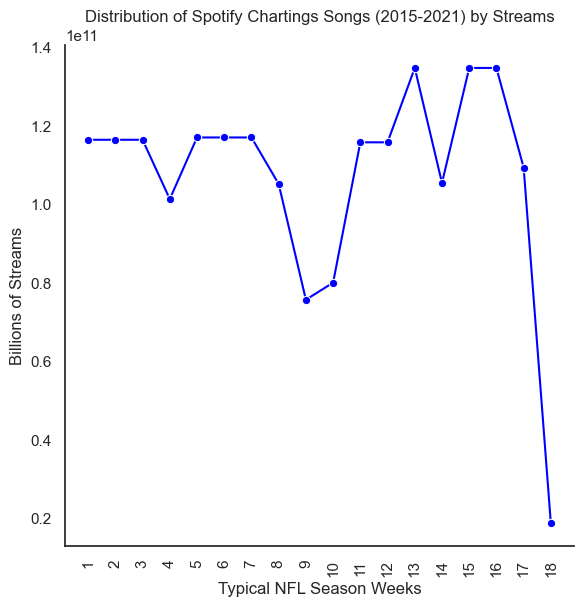

In [66]:
# Chart Aesthetics
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Chart Contents 
TsA = sns.FacetGrid(
					spotify_data2, 
					height=6) 
TsA.map(sns.lineplot, 'Week Number', 'Total Streams', marker='o', color='blue') 
TsA.set(xticks=spotify_data2['Week Number'])
TsA.set_xticklabels(rotation=90)

# Chart Legends
TsA.set(
    xlabel='Typical NFL Season Weeks',
    ylabel = 'Billions of Streams',
    title='Distribution of Spotify Chartings Songs (2015-2021) by Streams'
)

### Observations 

1. Between the seasons, there is a consistent peak of longer songs, most likely due to the holidays. 
2. Between the 2019 and 2020 NFL seasons, there was a monopoly of short songs (under 2 minutes) in the spotify charts. 
3. The majority of the songs charting via streaming (spotify) are songs that are radio-ready, implying that even with the advent of digital streaming, there is a legacy relationship between the songs that are "radio ready " (between 2 and 3 minutes)

#### Regarding the 3-minute "limit" 

> There have always been some type of restriction as it relates to the vehicle that carries music, ie. the storage technology. 

- The phonograph disc, which rotated at 78rpm could hold about 3 minutes. 
- In the 1960's, where the smaller disc which rotated at 45rpm could hold about 3 minutes. 
- In the turn of the millenia, CD-ROMS could hold about 20 songs of 3 minutes each

### Charting 2015-2021 Music by Artist

In [ ]:
# Chart Aesthetics
sns.set_theme(style="whitegrid", palette="muted")

# Chart Content 
MbA = sns.stripplot(
    data=spotify_data,
    x='streams',
    y='duration_cat',
    hue='explicit',
    size=3
    )

# Set axes labels and title
MbA.set(
    xlabel='Tens of millions of Streams',
    ylabel='Song Duration Category',
    title='Distribution of Spotify Charting Artists (2015-2021)'
)

# Set legend title
MbA.legend().set_title('Explicit')